## 1. Data Exploration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train = pd.read_csv('DailyDelhiClimateTrain.csv')
dataset_test = pd.read_csv('DailyDelhiClimateTest.csv')
cols = 5

In [ ]:
dataset_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
dataset_test.transpose()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
date,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,2017-04-24
meantemp,15.913043,18.5,17.111111,18.7,18.388889,19.318182,14.708333,15.684211,14.571429,12.111111,...,31.222222,31.0,32.555556,34.0,33.5,34.5,34.25,32.9,32.875,32.0
humidity,85.869565,77.222222,81.888889,70.05,74.944444,79.318182,95.833333,83.526316,80.809524,71.944444,...,30.444444,34.25,38.444444,27.333333,24.125,27.5,39.375,40.9,27.5,27.142857
wind_speed,2.743478,2.894444,4.016667,4.545,3.3,8.681818,10.041667,1.95,6.542857,9.361111,...,5.966667,2.1,5.366667,7.811111,9.025,5.5625,6.9625,8.89,9.9625,12.157143
meanpressure,59.0,1018.277778,1018.333333,1015.7,1014.333333,1011.772727,1011.375,1015.55,1015.952381,1016.888889,...,1002.444444,1003.25,1004.444444,1003.111111,1000.875,998.625,999.875,1001.6,1002.125,1004.142857


## 2. Data Visualisation

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

class plotly_graph:
    def __init__(self, data, date):
        self.data = data
        self.date = date
        self.var_names = ['Mean Temp', 'Humidity', 'Wind Speed', 'Mean Pressure']
        self.box_title = 'Box Plots of Features'
        self.line_title = 'Line Plots of Features'

    def make_subplot(self, graphs):
        fig = make_subplots(rows=2, cols=2, subplot_titles=(self.var_names))
        for i in range(4): fig.add_trace(graphs[i], row=i // 2 + 1, col=i % 2 + 1)
        return fig

    def box_plot(self):
        graph_lists = []
        for i, element in enumerate(self.data.transpose()):
            graph_list = go.Box(y = element,  boxpoints = 'outliers', line = dict(width=1))
            graph_lists.append(graph_list)

        fig = self.make_subplot(graph_lists)
        for i, var_name in enumerate(self.var_names):
            fig.update_traces(selector=dict(name=f'{i + 1}'), name=var_name)

        fig.update_layout(title=self.box_title, title_font=dict(size=30, family='Arial', color='black'), template = 'simple_white')
        fig.show()

    def line_plot(self):
        line_lists = []

        for i, element in enumerate(self.data.transpose()):
            line = go.Scatter(x = self.date, y = element,  mode = 'lines')
            line_lists.append(line)

        fig = self.make_subplot(line_lists)
        for i in range(4):
          fig.update_xaxes(title_text="Time", row=i // 2 + 1, col=i % 2 + 1)

        fig.update_layout(title=self.line_title, title_font=dict(size=30, family='Arial', color='black'), template = 'simple_white')
        fig.show()


#https://plotly.com/python/reference/layout/

In [ ]:
data_t = dataset_train.iloc[:, 1:cols].values
graph = plotly_graph(data_t, dataset_train['date'])

In [ ]:
graph.box_plot()

In [ ]:
graph.line_plot()

In [ ]:
# def humidity_pressure_ratio(df):
#    df['humidity_pressure_ratio'] = df['humidity'] / df['meanpressure']
#    return df

#training_set = humidity_pressure_ratio(training_set)
#test_set = humidity_pressure_ratio(test_set)

In [ ]:
training_set = dataset_train.iloc[:, 1:cols].values #dataset_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].values
test_set = dataset_test.iloc[:, 1:cols].values

## 3. Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.12227074, 0.8209571 , 0.        , 0.13260331],
       [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
       [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
       ...,
       [0.24745269, 0.88063806, 0.14842886, 0.13289464],
       [0.276718  , 0.84983498, 0.17349597, 0.13265971],
       [0.12227074, 1.        , 0.        , 0.1326467 ]])

In [ ]:
def look_back(dataset, look_back_period, total_records):
  X_train = []
  y_train = []
  for i in range(look_back_period, total_records):
    X_train.append(dataset[i-look_back_period:i,:])
    y_train.append(dataset[i, 0])

  return X_train, y_train

days = 60
X_train, y_train = look_back(training_set_scaled, days,1462)
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train

array([[[0.12227074, 0.8209571 , 0.        , 0.13260331],
        [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
        [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
        ...,
        [0.45240175, 0.50561056, 0.15774514, 0.13254256],
        [0.41048035, 0.45544554, 0.30689585, 0.13283265],
        [0.34643377, 0.41474147, 0.57003   , 0.13269009]],

       [[0.04279476, 0.90759076, 0.07058266, 0.132881  ],
        [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
        [0.08151383, 0.66886689, 0.02921206, 0.13279856],
        ...,
        [0.41048035, 0.45544554, 0.30689585, 0.13283265],
        [0.34643377, 0.41474147, 0.57003   , 0.13269009],
        [0.39737991, 0.46864686, 0.37245381, 0.13267924]],

       [[0.0356623 , 0.84983498, 0.10974262, 0.13299381],
        [0.08151383, 0.66886689, 0.02921206, 0.13279856],
        [0.        , 0.84790979, 0.08763619, 0.13271178],
        ...,
        [0.34643377, 0.41474147, 0.57003   , 0.13269009],
        [0.39737991, 0.468646

In [ ]:
X_train.shape

(1402, 60, 4)

## 4. Building LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
44/44 [==============================] - 27s 225ms/step - loss: 0.0412
Epoch 2/100
44/44 [==============================] - 6s 131ms/step - loss: 0.0125
Epoch 3/100
44/44 [==============================] - 5s 108ms/step - loss: 0.0128
Epoch 4/100
44/44 [==============================] - 5s 108ms/step - loss: 0.0105
Epoch 5/100
44/44 [==============================] - 6s 130ms/step - loss: 0.0094
Epoch 6/100
44/44 [==============================] - 5s 110ms/step - loss: 0.0102
Epoch 7/100
44/44 [==============================] - 6s 131ms/step - loss: 0.0098
Epoch 8/100
44/44 [==============================] - 6s 127ms/step - loss: 0.0098
Epoch 9/100
44/44 [==============================] - 6s 142ms/step - loss: 0.0094
Epoch 10/100
44/44 [==============================] - 5s 123ms/step - loss: 0.0086
Epoch 11/100
44/44 [==============================] - 5s 106ms/step - loss: 0.0087
Epoch 12/100
44/44 [==============================] - 6s 130ms/step - loss: 0.0082
Epoch 13/100

## 5. Making Prediction and Visualising Results

In [ ]:
real_temp = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = dataset_train.append(dataset_test)
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - days:, 1:cols].values
inputs = sc.transform(inputs)

<ipython-input-20-ff9a77b4163f>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
X_test = []
for i in range(days, days+len(dataset_test)):
    X_test.append(inputs[i-days:i, 0:cols])
X_test = np.array(X_test)


predicted_temp = regressor.predict(X_test)

temp = np.zeros((len(predicted_temp), cols-1))
for i in range(0, len(predicted_temp)):
    temp[i,0] = predicted_temp[i, 0]

predicted_temp = sc.inverse_transform(temp)[:,0]

4/4 [==============================] - 0s 52ms/step


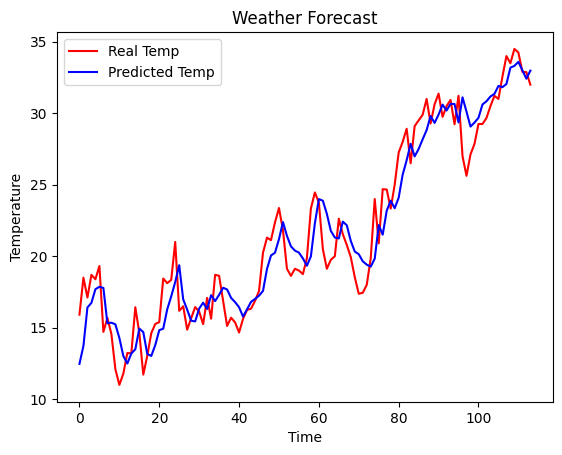

In [ ]:
plt.plot(real_temp, color = 'red', label = 'Real Temp')
plt.plot(predicted_temp, color = 'blue', label = 'Predicted Temp')
plt.title('Weather Forecast')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(real_temp, predicted_temp))

1.8907851890058192

In [ ]:
https://www.kaggle.com/code/wonduk/pytorch-lstm-daily-climate-forecasting